## Part 3: Data Wrangling and Transformation.

* ### Creating datasets for ML part

In [157]:
# set 'X' for features' and y' for the target ('quality').
y = dataset['quality']
X = dataset.drop('quality',  axis=1)

# for under-sampling dataset 
#y = dataset_under['quality']
#X = dataset_under.drop('quality',  axis=1)

# for over-sampling dataset 
#y = dataset_over['quality']
#X = dataset_over.drop('quality',  axis=1)

In [158]:
# preview of the first 5 lines of the loaded data 
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


* ### StandardScaler

In [159]:
# StandardScaler 
sc = StandardScaler()
dataset_sc = sc.fit_transform(X)
dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.220963,-0.045660,0.269673,3.057863,0.109646,0.645442,0.918111,2.518021,-1.285873,-0.358156,-1.556029
1,-0.626095,0.259242,0.084974,-0.907568,0.320836,-1.319250,-0.038321,0.187073,0.670487,-0.026096,-1.024679
2,1.552055,0.055974,0.639070,0.192787,0.373633,-0.305215,-0.919245,0.553365,0.409639,-0.441171,-0.569237
3,0.462980,-0.452195,-0.099724,0.524970,0.796013,0.772197,1.320819,0.719861,-0.046845,-0.773231,-0.721051
4,0.462980,-0.452195,-0.099724,0.524970,0.796013,0.772197,1.320819,0.719861,-0.046845,-0.773231,-0.721051


* ### 'Train\Test' split

In [160]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [161]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((6140, 11), (6140,))

In [162]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((1536, 11), (1536,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [163]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

* ### Classification report

In [164]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.716851  0.677546  0.696644       766
           1   0.695813  0.733766  0.714286       770

    accuracy                       0.705729      1536
   macro avg   0.706332  0.705656  0.705465      1536
weighted avg   0.706304  0.705729  0.705488      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.900000  0.693211  0.783186       766
           1   0.751586  0.923377  0.828671       770

    accuracy                       0.808594      1536
   macro avg   0.825793  0.808294  0.805929      1536
weighted avg   0.825600  0.808594  0.805988      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.970972  0.873368  0.919588       766
           1   0.885478  0.974026  0.927644       770

    accuracy                       0.923828      1536
   macro avg   0.928225  0.923697  0.923616

* ### Confusion matrix

In [165]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

LR Confusion Matrix: 
 [[519 247]
 [205 565]]

KNN Confusion Matrix: 
 [[531 235]
 [ 59 711]]

DT Confusion Matrix: 
 [[669  97]
 [ 20 750]]



* ### ROC-AUC score

In [166]:
roc_auc_score(DT_pred, y_test)

0.9282252910040217

* ### Build, train and evaluate models with hyperparameters

In [167]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [168]:
# print the best hyper parameters set
print("Logistic Regression Best Hyper Parameters:   ", LR1.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)

Logistic Regression Best Hyper Parameters:    {'C': 1, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg'}
K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 5}
Decision Tree Best Hyper Parameters:          {'criterion': 'gini', 'max_depth': 20, 'random_state': 0}


* ### Classification report

In [169]:
print("LR Classification Report: \n", classification_report(y_test, LR1_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN1_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT1_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.732493  0.682768  0.706757       766
           1   0.704380  0.751948  0.727387       770

    accuracy                       0.717448      1536
   macro avg   0.718436  0.717358  0.717072      1536
weighted avg   0.718400  0.717448  0.717099      1536

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.900000  0.693211  0.783186       766
           1   0.751586  0.923377  0.828671       770

    accuracy                       0.808594      1536
   macro avg   0.825793  0.808294  0.805929      1536
weighted avg   0.825600  0.808594  0.805988      1536

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.967456  0.853786  0.907074       766
           1   0.869767  0.971429  0.917791       770

    accuracy                       0.912760      1536
   macro avg   0.918612  0.912607  0.912432

* ### Confusion matrix

DT Confusion Matrix


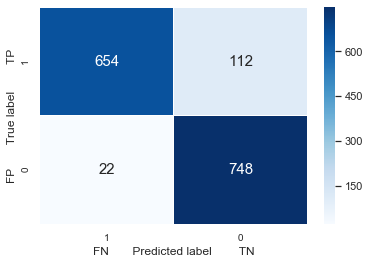

In [170]:
# confusion matrix of DT model
DT_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [171]:
roc_auc_score(DT1_pred, y_test)

0.9186115315811201

##  Conclusion.

In [172]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['quality'] = DT1_pred
sub.to_csv('WinePredictionsTest.csv', index=False)

**Question**: Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model).

**Answers**:

1. Binary classification was applied.

2. Classes were highly imbalanced with 78.36 % of '0' class and only 21.64 % of '1' class in our dataset. 

3. Three options were applied in order to calculate the best predictions:
    * Calculate predictions with imbalanced dataset
    * Calculate predictions with random under-sampling technique of an imbalanced dataset
    * Calculate predictions with random over-sampling technique of an imbalanced dataset
    
4. Three ML models were used: Logistic Regression, KNN, Decision Tree (without and with hyper parameters).

5. The best result was choosen: 
    * Random over-sampling dataset with 3838 enteties in class '0' and 3838 enteties in class '1', 7676 enteties in total.
    * Train/Test split: test_size=0.2, random_state=0
    * Decision Tree model without hyper parameters tuning, with an accuracy score equal 0.923828 and ROC-AUC score equal 0.928225.